## Loading data set

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [21]:
path = os.path.abspath('./datasets/mix_dataset/')

### Preprocessing training data

In [22]:
### Training dataset

img_height= 80
img_width= 80
batch_size = 128

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    class_names=['cracks', 'no-cracks'],
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
)

### Test dataset

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    class_names=['cracks', 'no-cracks'],
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
)

# most of the values are set y default, check later

Found 56316 files belonging to 2 classes.
Using 45053 files for training.
Found 56316 files belonging to 2 classes.
Using 11263 files for validation.


In [23]:
### Verify names for classes

class_names = train_dataset.class_names
class_names

['cracks', 'no-cracks']

### Visualizing images contained in dataset:

<ipython-input-24-ea7056c0e84e>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(5, 5, i + 1)


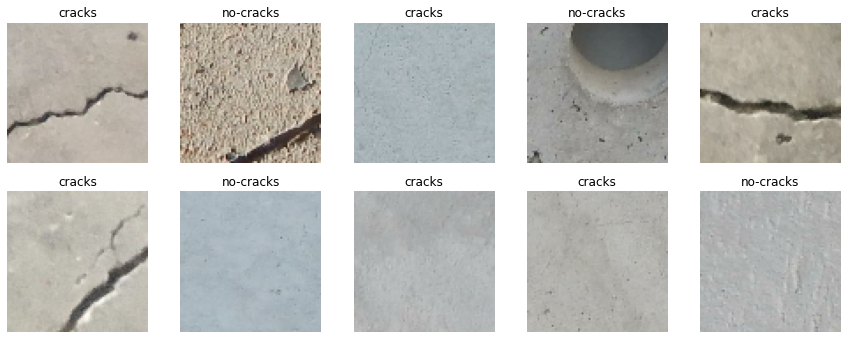

In [24]:
plt.figure(figsize=(15, 15))

for images, labels in train_dataset.take(6):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Rescaling pixels' values

The data provided is RGB therefore the values are in the [0,255] range. Due to it's more convenience to develop the neural network, the values will be rescaled.

In [25]:
### Verifying pixels' scale:

for images, labels in train_dataset.take(1):
    print("Scale max and min of pixels:")
    print(np.min(images), np.max(images))

Scale max and min of pixels:
0.98001814 255.0


In [26]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

In [27]:
image_batch, labels_batch = next(iter(normalized_train_dataset))
first_image = image_batch[0]
print("Scale max and min of pixels:")
print(np.min(first_image), np.max(first_image))

Scale max and min of pixels:
0.20156634 0.83925706


The dataset can be also normalized by adding a rescaling layer to the neural network (See: 2. Training Model)

## Training model

#### Configure for performance

In [28]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Training model

In [29]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [31]:
epochs_value = 6
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs= epochs_value
)

Epoch 1/6
352/352 [==============================] - 148s 420ms/step - loss: 0.5212 - accuracy: 0.7856 - val_loss: 0.3927 - val_accuracy: 0.8357
Epoch 2/6
352/352 [==============================] - 128s 364ms/step - loss: 0.3756 - accuracy: 0.8452 - val_loss: 0.3644 - val_accuracy: 0.8398
Epoch 3/6
352/352 [==============================] - 130s 368ms/step - loss: 0.3519 - accuracy: 0.8545 - val_loss: 0.3560 - val_accuracy: 0.8452
Epoch 4/6
352/352 [==============================] - 131s 371ms/step - loss: 0.3423 - accuracy: 0.8580 - val_loss: 0.3549 - val_accuracy: 0.8495
Epoch 5/6
352/352 [==============================] - 129s 365ms/step - loss: 0.3273 - accuracy: 0.8657 - val_loss: 0.3578 - val_accuracy: 0.8494
Epoch 6/6
352/352 [==============================] - 129s 367ms/step - loss: 0.3133 - accuracy: 0.8724 - val_loss: 0.3641 - val_accuracy: 0.8510


In [32]:
# model.summary()

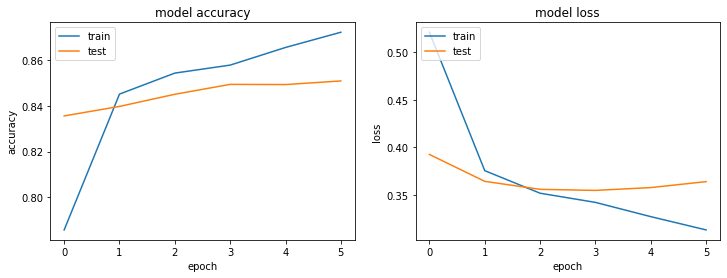

In [34]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
print('A first prediction model has been trained...')

A first prediction model has been trained...


Predictions:
 [0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
Labels:
 [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1]


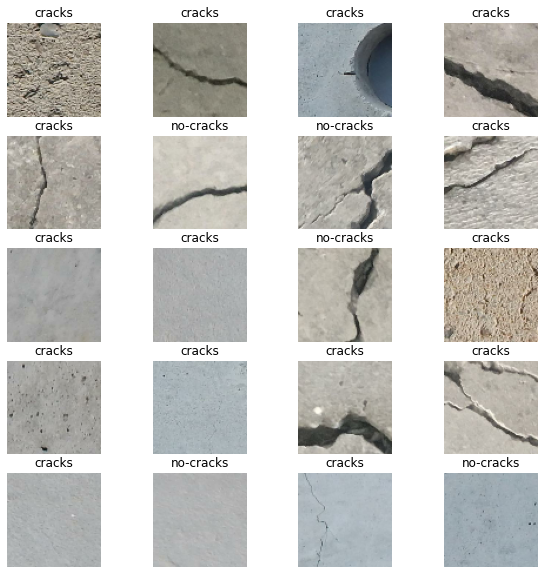

In [38]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
certainty = predictions*100
predictions = tf.where(predictions < 0.7, 0, 1)   #### Values found with more than 70% are classified as possitives
certainty = tf.where(certainty < 70, certainty , certainty )


print('Predictions:\n', predictions.numpy())
# print('Certainty:\n', certainty.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

## Tuning the model

### Data augmentation

*Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting then using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.*

In [39]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)

<ipython-input-40-40b7d1678a7f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(4, 4, i + 1)


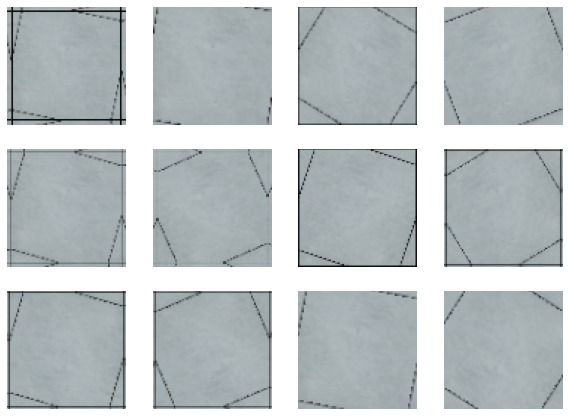

In [40]:
plt.figure(figsize=(10, 10))
for images, figure in train_dataset.take(2):
  for i in range(12):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Compile and train improved model

***Improvements:***
1. Data augmentation layer to increase training data.
2. Dropout layer to reduce overfitting
4. Tunning adam optimizer with learning rate
3. Increase number of epochs

Epoch 1/3
352/352 [==============================] - 170s 484ms/step - loss: 0.5575 - accuracy: 0.7813 - val_loss: 0.4685 - val_accuracy: 0.8199
Epoch 2/3
352/352 [==============================] - 172s 488ms/step - loss: 0.4303 - accuracy: 0.8223 - val_loss: 0.4158 - val_accuracy: 0.8314
Epoch 3/3
352/352 [==============================] - 169s 479ms/step - loss: 0.4042 - accuracy: 0.8303 - val_loss: 0.4060 - val_accuracy: 0.8320


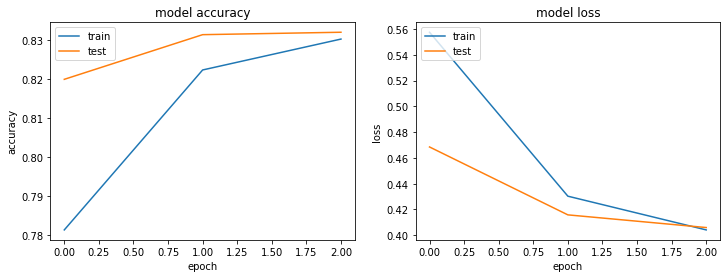

In [48]:
num_classes = 2
epochs_value = 3

model = tf.keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

model.compile(
  optimizer=opt,
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs= epochs_value
)

# summarize history for accuracy

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Create the base model from the pre-trained convnets



In [49]:
# Create the base model from the pre-trained model MobileNet V2
BATCH_SIZE = 64
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')



In [50]:
IMG_SHAPE

(160, 160, 3)

In [51]:
### Preprocess input according with scale expected for mobilenetV2

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [52]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(128, 2, 2, 1280)


This feature extractor converts each 160x160x3 image into a 8x8x1280 block of features. Let's see what it does to an example batch of images:

In [53]:
### Feature extraction

In [54]:
### Freeze the convolutional base

In [55]:
base_model.trainable = False

In [56]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [57]:
### Add a classification head

In [58]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(128, 1280)


In [59]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(128, 1)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value.  Positive numbers predict class 1, negative numbers predict class 0.

In [60]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [61]:
base_learning_rate = 0.0002
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 80, 80, 3)         0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)             

In [63]:
len(model.trainable_variables)

2

In [64]:
initial_epochs = 5

loss0, accuracy0 = model.evaluate(test_dataset)

88/88 [==============================] - 31s 350ms/step - loss: 0.9059 - accuracy: 0.3709


In [65]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.91
initial accuracy: 0.37


In [66]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset)

Epoch 1/5
352/352 [==============================] - 193s 549ms/step - loss: 0.5111 - accuracy: 0.7055 - val_loss: 0.3987 - val_accuracy: 0.8389
Epoch 2/5
352/352 [==============================] - 202s 573ms/step - loss: 0.4084 - accuracy: 0.7951 - val_loss: 0.3618 - val_accuracy: 0.8530
Epoch 3/5
352/352 [==============================] - 194s 551ms/step - loss: 0.3876 - accuracy: 0.8111 - val_loss: 0.3529 - val_accuracy: 0.8576
Epoch 4/5
352/352 [==============================] - 195s 554ms/step - loss: 0.3768 - accuracy: 0.8206 - val_loss: 0.3453 - val_accuracy: 0.8594
Epoch 5/5
352/352 [==============================] - 196s 556ms/step - loss: 0.3720 - accuracy: 0.8213 - val_loss: 0.3405 - val_accuracy: 0.8625


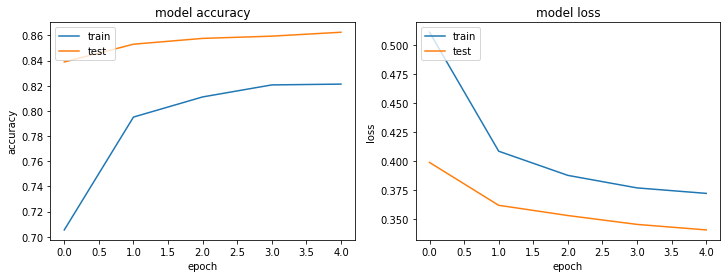

In [67]:
# summarize history for accuracy

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating model after transfering-learning

In [68]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

88/88 [==============================] - 30s 339ms/step - loss: 0.3405 - accuracy: 0.8625
Test accuracy : 0.8624700307846069


Predictions:
 [1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1]
Labels:
 [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1]


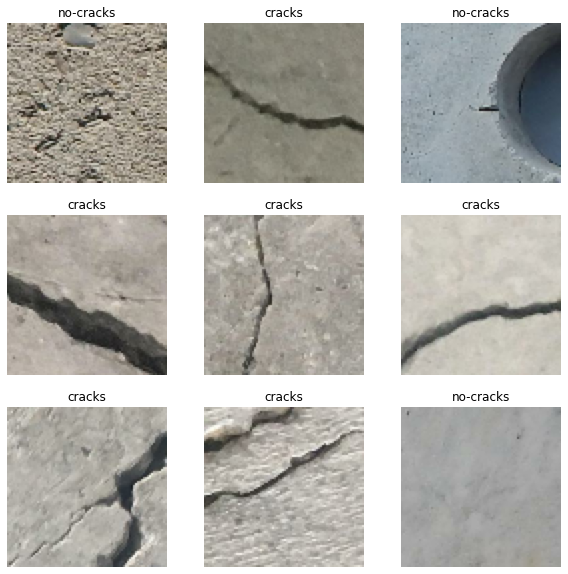

In [69]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [71]:
model.save('trained_models/model_crack_detention.h5')
model.save_weights('trained_models/weights_crack_detention.h5')

## Fine Tuning

#### Un-freeze the top layers of the model

In [72]:
base_model.trainable = True

In [73]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  155


In [74]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [75]:
### Compile the model

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/100),
              metrics=['accuracy'])

In [76]:
len(model.trainable_variables)

58

In [77]:
### Continue training the model

In [78]:
fine_tune_epochs = 3
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset)

Epoch 5/8
352/352 [==============================] - 299s 850ms/step - loss: 0.3473 - accuracy: 0.8403 - val_loss: 0.3126 - val_accuracy: 0.8754
Epoch 6/8
352/352 [==============================] - 299s 850ms/step - loss: 0.3312 - accuracy: 0.8528 - val_loss: 0.3011 - val_accuracy: 0.8809
Epoch 7/8
352/352 [==============================] - 299s 848ms/step - loss: 0.3169 - accuracy: 0.8607 - val_loss: 0.2929 - val_accuracy: 0.8838
Epoch 8/8
352/352 [==============================] - 298s 848ms/step - loss: 0.3096 - accuracy: 0.8651 - val_loss: 0.2870 - val_accuracy: 0.8862


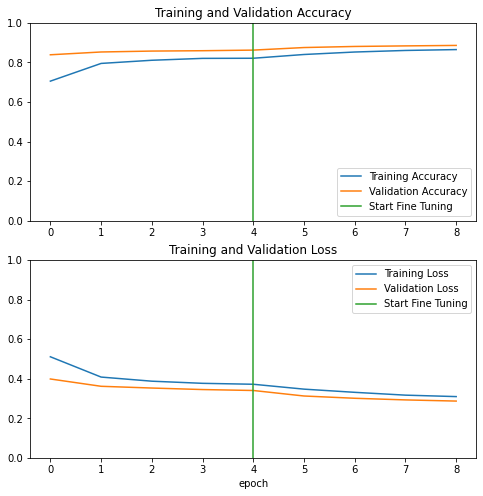

In [79]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [80]:
### Evaluation and prediction

In [81]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

88/88 [==============================] - 31s 358ms/step - loss: 0.2870 - accuracy: 0.8862
Test accuracy : 0.8861759901046753


Predictions:
 [1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1]
Labels:
 [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1]


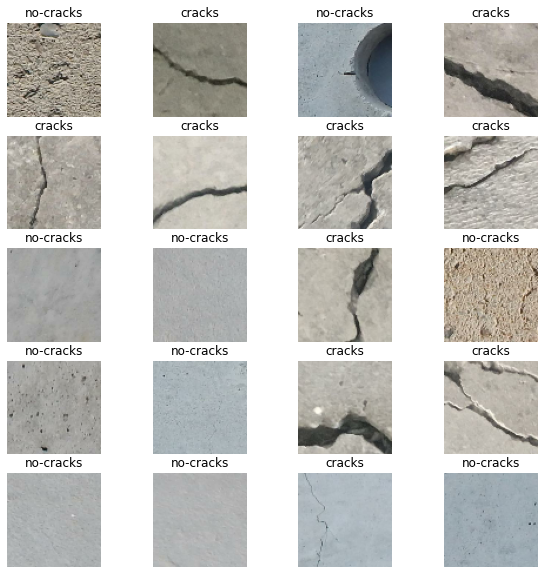

In [82]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [83]:
model.save('trained_models/model_fine_tuned_crack_detection.h5')
model.save_weights('trained_models/weights_fine_tuned_crack_detection.h5')